Programa que carga datos de un archivo separado por comas.
Este archivo contiene información acerca de los pasajeros que embarcaron en el Titanic.
En esta sección se muestran los datos de aquellos pasajeros que sobrevivieron. Agrupados por género, ubicación dentro del barco, el tipo de pasaje que adquirieron y el bote salvavidas que usaron para sobrevivir.

In [57]:
import pandas as pd
import numpy as np
import random

datos = pd.read_csv('titanic_custom.csv')
sobrevivientes = datos[datos['survived'] == 1]
sobrevivientesPorGenero = sobrevivientes.groupby(['sex']).size().reset_index(name = 'Sobrevivientes por genero')
sobrevivientesPorClase = sobrevivientes.groupby(['pclass']).size().reset_index(name = 'Sobreviviente por Categoria Ticket')
sobrevivientesPorBote = sobrevivientes.groupby(['boat']).size().reset_index(name = 'Sobreviviente por Bote')
sobrevivientesPorGeneroYEdad = sobrevivientes.groupby(['sex','age']).size().reset_index(name = 'Gupo de Edad Con Mayor Sobrevivientes')
print(sobrevivientesPorGenero)
print(sobrevivientesPorClase)
print(sobrevivientesPorBote)
print(sobrevivientesPorGeneroYEdad)
print(sobrevivientesPorGeneroYEdad.groupby('sex')['Gupo de Edad Con Mayor Sobrevivientes'].max().reset_index()) 




      sex  Sobrevivientes por genero
0  female                        339
1    male                        161
   pclass  Sobreviviente por Categoria Ticket
0       1                                 200
1       2                                 119
2       3                                 181
       boat  Sobreviviente por Bote
0         1                       5
1        10                      29
2        11                      25
3        12                      18
4        13                      39
5     13 15                       2
6   13 15 B                       1
7        14                      32
8        15                      37
9     15 16                       1
10       16                      23
11        2                      13
12        3                      26
13        4                      31
14        5                      27
15      5 7                       2
16      5 9                       1
17        6                      20
18        7          

In [59]:
edadMediaPasajeros = datos["age"].mean()
edadMediaSobrevivientes = sobrevivientes["age"].mean()

print(f"La edad media de todos los pasajeros es : {edadMediaPasajeros:.2f}")
print(f"La edad media de sobrevivientes es: {edadMediaSobrevivientes:.2f}")



La edad media de todos los pasajeros es : 29.88
La edad media de sobrevivientes es: 28.92


Se enriquece el dataframe con una columna que indica la ubicacion del pasajero dentro del barco, al momento de sonar las alarmas.
Para generar la ubicación del pasajero se utilizó una lista de ubicaciones, desde donde se selecciona aleatoriamente un elemento, esto por cada registro del DataFrame

In [18]:
lista_ubicaciones = ["cubierta","bodega","comedor","pistabaile","camarote"]
lista_aleatoria = random.choices(lista_ubicaciones,k=datos.shape[0])
datos['ubicacion'] = lista_aleatoria

sobrevivientesEnriquecido = datos[datos['survived'] == 1]
sobrevivientesPorUbicacion =  sobrevivientesEnriquecido.groupby(['ubicacion']).size().reset_index(name = 'Ubicacion al Sonar Alarma')

print(sobrevivientesPorUbicacion)

    ubicacion  Ubicacion al Sonar Alarma
0      bodega                        110
1    camarote                        108
2     comedor                         90
3    cubierta                         97
4  pistabaile                         95


Sección para graficar información

Text(0.5, 1.0, 'Cantidad Sobrevivientes por Ubicación')

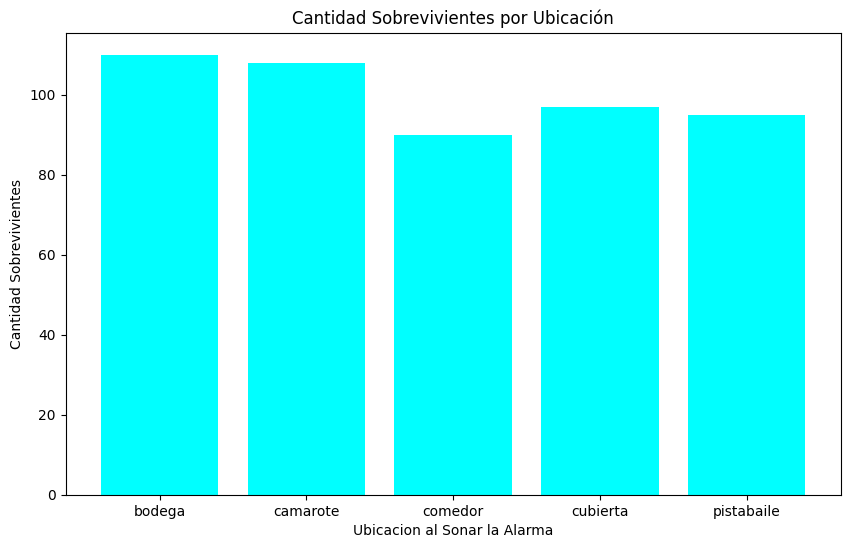

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.bar(sobrevivientesPorUbicacion['ubicacion'], sobrevivientesPorUbicacion['Ubicacion al Sonar Alarma'], color='cyan')
plt.xlabel('Ubicacion al Sonar la Alarma')
plt.ylabel('Cantidad Sobrevivientes')
plt.title('Cantidad Sobrevivientes por Ubicación')

Visualización de Pasajeros por Género

Muestra información de pasajeros agrupados por género. Se puede observar que habían mas pasajeros hombres que mujeres.

<Axes: title={'center': 'Sobrevivientes por Género'}>

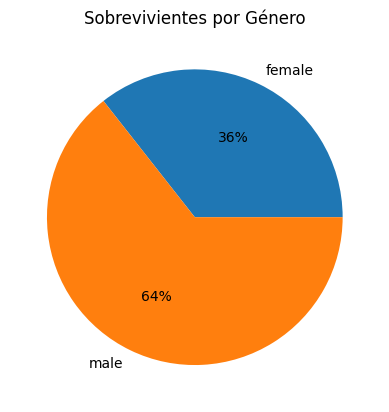

In [61]:
datos.groupby(['sex']).size().plot.pie(y='sex',autopct='%1.0f%%',title='Pasajeros agrupados por Género')

Visualización de Sobrevivientes por Género

<Axes: title={'center': 'Sobrevivientes por Género'}>

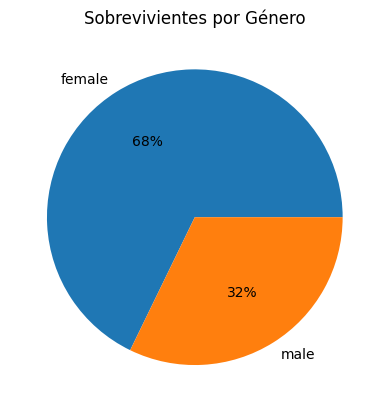

In [62]:
sobrevivientes.groupby(['sex']).size().plot.pie(y='sex',autopct='%1.0f%%',title='Sobrevivientes por Género')

Visualizar Sobrevivientes por rango de Edad de acuerdo al Género



Text(0.5, 1.0, 'Cantidad Sobrevivientes por Edad')

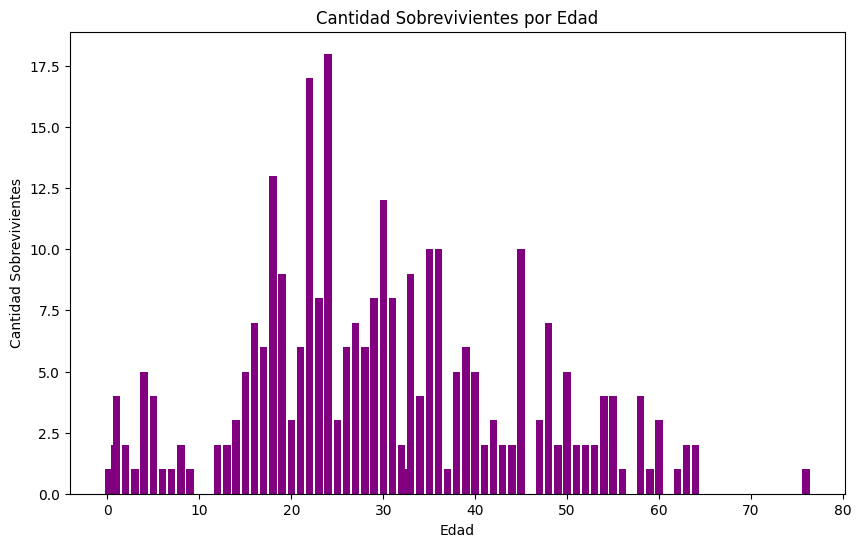

In [47]:




sobrevivientesMale = sobrevivientes[sobrevivientes['sex']=='male']
sobrevivientesFemale = sobrevivientes[sobrevivientes['sex']=='female']

plt.figure(figsize=(10, 6))
listaEjemplo = sobrevivientesFemale.groupby(['age']).size().reset_index(name = 'Sobrevivientes por edad')
plt.bar(listaEjemplo['age'],listaEjemplo['Sobrevivientes por edad'], color='purple')
plt.xlabel('Edad')
plt.ylabel('Cantidad Sobrevivientes')
plt.title('Cantidad de Mujeres Sobrevivientes por Edad')



Resumen de Análisis Realizado.

1. El grupo de personas que tuvo la mayor cantidad de sobreviviente son las mujeres.
2. Dentro del grupo de sobrevivientes mujeres, el grupo etario que mas sobrevivientes tuvo fue el de los 18 años.
3. El nivel económico pudo influir en la cantidad de sobrevivientes, debido a que existen mas pasajeros de primera clase que sobrevivieron.
4. Considerando la ubicación de los pasajeros al momento en el que se activaron las alarmas, aquellos pasajeros que se encontraban en la bodega del barco tuvieron mas probabilidad de salvarse. Esto puede deberse a la ubicación de los botes salvavidas, o que en la bodega se encontraban artefactos que mejoraron la flotabilidad de los pasajeros.
5. A pesar de que la cantidad de pasajeros Mujeros era menor, la cantidad de personas que sobrevivió en este grupo es mayo a la cantidad de sobrevivientes masculinos. Lo que puede sustentarse en la frase "Mujeres y Niños primero" al momento de una evacuación.